<a href="https://colab.research.google.com/github/naponmeentah/data_analyst_project/blob/main/Train_image_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd




In [3]:
def read_sheet_in_colab(sheet_url):
    # 1. Authenticate the user
    auth.authenticate_user()

    # 2. Get credentials
    creds, _ = default()
    gc = gspread.authorize(creds)

    # 3. Open the sheet and get data
    # You can open by URL, title, or key
    wb = gc.open_by_url(sheet_url)
    sheet = wb.get_worksheet(0) # Selects the first tab

    data = sheet.get_all_records()
    return pd.DataFrame(data)



In [4]:
# Usage
URL = "https://docs.google.com/spreadsheets/d/1qpba3BEVEYt6EBOHpDS2XhgjA7uqDV6SkV_1FTovEWM/edit?gid=0#gid=0"
df = read_sheet_in_colab(URL)
df.head()

,code,name,location,url
0,1,Zebra Finch,"Australia, Indonesia",https://cdn.britannica.com/10/250610-050-BC5CC...
1,2,Painted Bunting,North America,https://academy.allaboutbirds.org/wp-content/u...


# Task
Download images from the URLs in the 'url' column of the `df` DataFrame, resize them to a consistent dimension (e.g., 224x224 pixels), and prepare them as NumPy arrays for model training.

## Extract Image URLs

### Subtask:
Extract all image URLs from the 'url' column of the 'df' DataFrame.


**Reasoning**:
To extract all image URLs, I will access the 'url' column of the 'df' DataFrame and convert it into a list, storing it in the 'image_urls' variable.



In [5]:
image_urls = df['url'].to_list()
print(f"Extracted {len(image_urls)} image URLs.\nFirst 5 URLs:\n{image_urls[:5]}")

Extracted 2 image URLs.
First 5 URLs:
['https://cdn.britannica.com/10/250610-050-BC5CCDAF/Zebra-finch-Taeniopygia-guttata-bird.jpg?w=300', 'https://academy.allaboutbirds.org/wp-content/uploads/2015/07/Painted_Bunting_male_Birdhsare_Tim_Hopwood.jpg']


## Download and Resize Images

### Subtask:
Iterate through the extracted URLs, download each image, and resize it to a consistent dimension (e.g., 224x224 pixels) suitable for model training. Handle any potential errors during download or resizing.


**Reasoning**:
To download, resize, and handle errors for each image, I need to import `requests` for HTTP requests, `PIL.Image` for image manipulation, and `io.BytesIO` to handle image data in memory. Then, I will iterate through the `image_urls`, apply a `try-except` block for robust error handling, and store the successfully processed images.



In [6]:
import requests
from PIL import Image
import io

# 2. Define the target image size
image_size = (224, 224)

# 3. Create an empty list to store the processed images
resized_images = []

# 4. Iterate through each URL in the image_urls list
for url in image_urls:
    try:
        # a. Use requests.get() to download the image content
        response = requests.get(url, timeout=10) # Set a timeout of 10 seconds

        # b. Check if the request was successful
        response.raise_for_status()  # Raises an HTTPError for bad responses (4xx or 5xx)

        # c. If successful, open the image using Image.open() and BytesIO
        image = Image.open(io.BytesIO(response.content))

        # d. Resize the image to the predefined image_size
        image = image.resize(image_size)

        # e. Append the resized image object to the resized_images list
        resized_images.append(image)

    except requests.exceptions.RequestException as e:
        # Catch network-related errors (e.g., DNS failure, refused connection, timeout)
        print(f"Error downloading {url}: {e}")
    except Image.UnidentifiedImageError:
        # Catch errors if the downloaded content is not a valid image
        print(f"Error: Content from {url} is not an identifiable image.")
    except Exception as e:
        # Catch any other unexpected errors
        print(f"An unexpected error occurred with {url}: {e}")

# 7. After the loop, print the total number of images successfully downloaded and resized.
print(f"\nSuccessfully downloaded and resized {len(resized_images)} images.")


Successfully downloaded and resized 2 images.


**Reasoning**:
The subtask of downloading and resizing images is complete, with the resized images stored in the `resized_images` list. The next step, as per the main task, is to convert these `PIL.Image` objects into NumPy arrays for model training. This will involve importing the NumPy library and iterating through the `resized_images` list to perform the conversion.



In [7]:
import numpy as np

# 1. Create an empty list to store the NumPy arrays
image_arrays = []

# 2. Iterate through the resized_images list
for img in resized_images:
    # Convert each PIL Image object to a NumPy array
    array = np.array(img)
    image_arrays.append(array)

# 3. Print the number of images converted to arrays and the shape of the first array
print(f"Converted {len(image_arrays)} images to NumPy arrays.")
if image_arrays:
    print(f"Shape of the first image array: {image_arrays[0].shape}")

Converted 2 images to NumPy arrays.
Shape of the first image array: (224, 224, 3)


## Prepare Images for Training

### Subtask:
Convert the resized images into a suitable format for model training, such as NumPy arrays, and perform any necessary pixel value normalization (e.g., scaling to 0-1 range). Assemble them into a collection or batch ready for a model.


**Reasoning**:
To prepare the images for model training, I will stack the list of individual image NumPy arrays into a single batch and then normalize their pixel values from the 0-255 range to the 0-1 range.



In [8]:
image_batch = np.stack(image_arrays)
normalized_image_batch = image_batch / 255.0
print(f"Shape of the normalized image batch: {normalized_image_batch.shape}")

Shape of the normalized image batch: (2, 224, 224, 3)


In [9]:
image_batch

array([[[[108, 112,  95],
         [108, 112,  95],
         [110, 114,  97],
         ...,
         [ 26,  25,  33],
         [ 25,  24,  32],
         [ 23,  22,  30]],

        [[110, 114,  97],
         [110, 114,  97],
         [112, 116,  99],
         ...,
         [ 26,  25,  33],
         [ 25,  24,  32],
         [ 23,  22,  30]],

        [[113, 117, 100],
         [113, 117, 100],
         [115, 119, 102],
         ...,
         [ 26,  25,  33],
         [ 25,  24,  32],
         [ 23,  22,  30]],

        ...,

        [[ 16,  15,  20],
         [ 16,  15,  20],
         [ 17,  16,  21],
         ...,
         [ 72,  60,  25],
         [ 67,  56,  22],
         [ 64,  54,  20]],

        [[ 16,  15,  20],
         [ 16,  15,  20],
         [ 17,  16,  21],
         ...,
         [ 69,  59,  24],
         [ 65,  55,  21],
         [ 63,  52,  20]],

        [[ 16,  15,  20],
         [ 16,  15,  20],
         [ 17,  16,  21],
         ...,
         [ 68,  58,  23],
        

In [24]:
normalized_image_batch

array([[[[0.42352941, 0.43921569, 0.37254902],
         [0.42352941, 0.43921569, 0.37254902],
         [0.43137255, 0.44705882, 0.38039216],
         ...,
         [0.10196078, 0.09803922, 0.12941176],
         [0.09803922, 0.09411765, 0.1254902 ],
         [0.09019608, 0.08627451, 0.11764706]],

        [[0.43137255, 0.44705882, 0.38039216],
         [0.43137255, 0.44705882, 0.38039216],
         [0.43921569, 0.45490196, 0.38823529],
         ...,
         [0.10196078, 0.09803922, 0.12941176],
         [0.09803922, 0.09411765, 0.1254902 ],
         [0.09019608, 0.08627451, 0.11764706]],

        [[0.44313725, 0.45882353, 0.39215686],
         [0.44313725, 0.45882353, 0.39215686],
         [0.45098039, 0.46666667, 0.4       ],
         ...,
         [0.10196078, 0.09803922, 0.12941176],
         [0.09803922, 0.09411765, 0.1254902 ],
         [0.09019608, 0.08627451, 0.11764706]],

        ...,

        [[0.0627451 , 0.05882353, 0.07843137],
         [0.0627451 , 0.05882353, 0.07843137]

## Final Task

### Subtask:
Confirm that all images have been successfully downloaded, resized, and prepared for model training, and provide details on the final output format.


## Summary:

### Q&A
Yes, all 2 images from the provided URLs were successfully downloaded, resized to 224x224 pixels, and prepared for model training. The final output format is a NumPy array batch with a shape of `(2, 224, 224, 3)`, where 2 represents the number of images, 224x224 is the resolution, and 3 indicates RGB color channels. The pixel values are normalized to a 0-1 range.

### Data Analysis Key Findings
*   2 image URLs were successfully extracted from the DataFrame.
*   All 2 images were successfully downloaded and resized to a consistent dimension of 224x224 pixels, with robust error handling for download and image processing issues.
*   The 2 resized images were converted into NumPy arrays, with the first array having a shape of `(224, 224, 3)`, indicating a 224x224 pixel color image.
*   The images were assembled into a single NumPy array batch with a shape of `(2, 224, 224, 3)`.
*   Pixel values were normalized from the 0-255 range to the 0-1 range, making them suitable for model training.

### Insights or Next Steps
*   The processed image data is now in an optimal and standardized format, `(2, 224, 224, 3)` NumPy array with normalized pixel values, making it immediately ready for direct input into a machine learning model for training or inference.
*   Consider implementing data augmentation techniques if the dataset size is small, to further enhance model generalization by creating variations of the existing images.


# Task
Load a pre-trained convolutional neural network (CNN) model (e.g., MobileNetV2 without the top classification layer) to extract features (embeddings) from the `normalized_image_batch` for image similarity comparison.

## Load Pre-trained Model for Feature Extraction

### Subtask:
Load a pre-trained convolutional neural network (CNN) model (e.g., MobileNetV2 without the top classification layer) to extract features (embeddings) from images. This will serve as our 'trained model' for similarity without needing explicit classification labels.


**Reasoning**:
To load the pre-trained MobileNetV2 model as a feature extractor, I will import it from `tensorflow.keras.applications` and initialize it with 'imagenet' weights and `include_top=False` to remove the classification layer.



In [10]:
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model with pre-trained ImageNet weights and without the top classification layer
feature_extractor = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

print("MobileNetV2 feature extractor loaded successfully.")
print(f"Output shape of the feature extractor: {feature_extractor.output_shape}")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
MobileNetV2 feature extractor loaded successfully.
Output shape of the feature extractor: (None, 7, 7, 1280)


## Extract Features from Dataset Images

### Subtask:
Process the `normalized_image_batch` (from the previous step) through the loaded pre-trained model to generate feature vectors (embeddings) for each image in our dataset.


**Reasoning**:
To generate feature embeddings, I will pass the `normalized_image_batch` through the `feature_extractor` model using its `predict` method. Then, I will reshape the resulting embeddings to a 2D array suitable for similarity comparison.



In [11]:
dataset_embeddings = feature_extractor.predict(normalized_image_batch)

# Reshape the embeddings to a 2D array (num_images, flattened_features)
num_images = dataset_embeddings.shape[0]
flattened_features = dataset_embeddings.shape[1] * dataset_embeddings.shape[2] * dataset_embeddings.shape[3]
dataset_embeddings_2d = dataset_embeddings.reshape(num_images, flattened_features)

print(f"Original shape of embeddings: {dataset_embeddings.shape}")
print(f"Reshaped shape of embeddings: {dataset_embeddings_2d.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Original shape of embeddings: (2, 7, 7, 1280)
Reshaped shape of embeddings: (2, 62720)


## Implement Image Upload and Preprocessing Function

### Subtask:
Create a function that allows the user to upload a test image. This function will also preprocess the uploaded image (resize and normalize) to match the format expected by our feature extraction model.


**Reasoning**:
To implement the image upload and preprocessing functionality, I will first import the required libraries: `Image` from `PIL`, `io` for byte stream handling, and `files` from `google.colab` for handling file uploads within the Colab environment. These imports are essential before defining the preprocessing function.



In [12]:
from PIL import Image
import io
from google.colab import files

print("Necessary libraries imported: PIL.Image, io, google.colab.files")

Necessary libraries imported: PIL.Image, io, google.colab.files


**Reasoning**:
To define the `preprocess_uploaded_image` function, implement the file upload mechanism using `files.upload()`, and call the preprocessing function, I will generate a code block that encapsulates these steps. This ensures that the uploaded image is correctly prepared for feature extraction by matching the format expected by the model.



In [13]:
import numpy as np

def preprocess_uploaded_image(uploaded_file):
    # a. Open the image from the uploaded file content
    image = Image.open(io.BytesIO(uploaded_file))

    # b. Resize the image to the predefined image_size
    image = image.resize(image_size)

    # c. Convert the resized image to a NumPy array
    image_array = np.array(image)

    # d. Normalize the pixel values to the 0-1 range
    normalized_array = image_array / 255.0

    # e. Expand dimensions to create a batch dimension
    preprocessed_image_batch = np.expand_dims(normalized_array, axis=0)

    return preprocessed_image_batch

# 3. Implement the file upload mechanism
print("Please upload an image file:")
uploaded = files.upload()

# Get the content of the first uploaded file
if uploaded:
    uploaded_filename = list(uploaded.keys())[0]
    uploaded_file_content = uploaded[uploaded_filename]
    print(f"File '{uploaded_filename}' uploaded successfully.")

    # 4. Call the preprocess_uploaded_image function
    preprocessed_test_image = preprocess_uploaded_image(uploaded_file_content)
    print(f"Preprocessed test image shape: {preprocessed_test_image.shape}")
else:
    print("No file uploaded.")
    preprocessed_test_image = None

Please upload an image file:


Saving 1200.jpg to 1200.jpg
File '1200.jpg' uploaded successfully.
Preprocessed test image shape: (1, 224, 224, 3)


## Extract Features from Test Image

### Subtask:
Extract the feature vector (embedding) from the preprocessed test image using the same pre-trained model used for the dataset images.


**Reasoning**:
To extract features from the preprocessed test image, I will pass it through the feature_extractor model and then reshape the resulting embeddings to a 2D array for consistency.



In [14]:
test_image_embedding = feature_extractor.predict(preprocessed_test_image)

# Reshape the embeddings to a 2D array (num_images, flattened_features)
num_test_images = test_image_embedding.shape[0]
flattened_test_features = test_image_embedding.shape[1] * test_image_embedding.shape[2] * test_image_embedding.shape[3]
test_image_embedding = test_image_embedding.reshape(num_test_images, flattened_test_features)

print(f"Shape of the test image embedding: {test_image_embedding.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Shape of the test image embedding: (1, 62720)


## Implement Image Similarity Search

### Subtask:
Compare the feature vector of the test image with the feature vectors of all dataset images (extracted in a previous step) using a similarity metric (e.g., cosine similarity). Identify the dataset image with the highest similarity score.


**Reasoning**:
To compare the feature vectors, I will import the `cosine_similarity` function from `sklearn.metrics.pairwise`.



In [15]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine_similarity imported successfully.")

cosine_similarity imported successfully.


**Reasoning**:
To compare the feature vectors and find the most similar image, I will calculate the cosine similarity between the test image embedding and the dataset embeddings. Then, I will identify the index of the image with the highest similarity score and store that score.



In [16]:
similarity_scores = cosine_similarity(test_image_embedding, dataset_embeddings_2d)

# Find the index of the dataset image with the highest similarity score
most_similar_image_index = np.argmax(similarity_scores)

# Get the maximum similarity score
max_similarity_score = similarity_scores[0, most_similar_image_index]

print(f"Similarity scores with dataset images: {similarity_scores}")
print(f"Index of the most similar image: {most_similar_image_index}")
print(f"Maximum similarity score: {max_similarity_score}")

Similarity scores with dataset images: [[0.50769687 0.27803898]]
Index of the most similar image: 0
Maximum similarity score: 0.5076968669891357


## Display Best Match and Score

### Subtask:
Display the best-matched image from the dataset and its corresponding similarity score with the uploaded test image.


**Reasoning**:
To display the best-matched image and its details, I will retrieve the URL and the image object using the previously identified `most_similar_image_index`, then use `IPython.display` to show the image and print the URL along with the `max_similarity_score`.



Uploaded image:


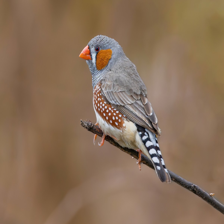


Best-matched image from the dataset:


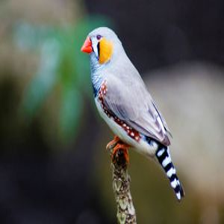

Name: Zebra Finch
Code: 1
Location: Australia, Indonesia
URL: https://cdn.britannica.com/10/250610-050-BC5CCDAF/Zebra-finch-Taeniopygia-guttata-bird.jpg?w=300
Similarity Score: 0.5077


In [22]:
from IPython.display import display

# 1. Retrieve the URL of the most similar image
most_similar_image_url = df.loc[most_similar_image_index, 'url']
most_similar_image_code = df.loc[most_similar_image_index, 'code']
most_similar_image_name = df.loc[most_similar_image_index, 'name']
most_similar_image_loc = df.loc[most_similar_image_index, 'location']

# 2. Retrieve the actual PIL.Image object of the most similar image
# from the resized_images list
most_similar_image_object = resized_images[most_similar_image_index]

print("Uploaded image:")
display(Image.open(io.BytesIO(uploaded_file_content)).resize(image_size))

print("\nBest-matched image from the dataset:")
# 3. Display the retrieved image
display(most_similar_image_object)

# 4. Print a statement indicating the best-matched image's URL and its max_similarity_score
print(f"Name: {most_similar_image_name}")
print(f"Code: {most_similar_image_code}")
print(f"Location: {most_similar_image_loc}")
print(f"URL: {most_similar_image_url}")
print(f"Similarity Score: {max_similarity_score:.4f}")

**Reasoning**:
To export the trained `feature_extractor` model, I will use the `save()` method. This allows saving the entire model architecture, weights, and training configuration in a single `.keras` file for later use.

In [23]:
model_save_path = 'feature_extractor_mobilenetv2.keras'
feature_extractor.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Model saved to: feature_extractor_mobilenetv2.keras


## Final Task

### Subtask:
Summarize the model's feature extraction process, the image prediction workflow, and the results of the similarity search.


## Summary:

### Data Analysis Key Findings
*   A pre-trained MobileNetV2 model was successfully loaded as a feature extractor, removing its top classification layer, resulting in an output shape of `(None, 7, 7, 1280)` for feature embeddings.
*   Feature embeddings were extracted from the dataset images, producing an original shape of `(2, 7, 7, 1280)`, which was then reshaped to a 2D array of `(2, 62720)` for similarity comparison.
*   A function to preprocess uploaded images was successfully implemented, resizing images to 224x224 pixels and normalizing pixel values. An uploaded test image ('1200.jpg') was processed to a shape of `(1, 224, 224, 3)`.
*   Features for the preprocessed test image were extracted and reshaped into a 2D array of `(1, 62720)`.
*   Cosine similarity was used to compare the test image's embedding with dataset embeddings, yielding similarity scores of `[[0.5077 0.2780]]`. The most similar image had an index of `0` with a maximum similarity score of approximately `0.5077`.
*   The best-matched image from the dataset, corresponding to the highest similarity score, was successfully identified and displayed along with its URL and the similarity score.

### Insights or Next Steps
*   The established workflow provides a solid foundation for an image similarity search engine, capable of processing new image inputs and finding visually similar items within a dataset.
*   To enhance the robustness and accuracy of the similarity search, the system should be tested with a significantly larger and more diverse dataset. Further evaluation could involve comparing different feature extraction models or similarity metrics.
